<a href="https://colab.research.google.com/github/lalitapunmagar1/AI-ML/blob/main/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

##Create the custom dataset with make_blob and plot it

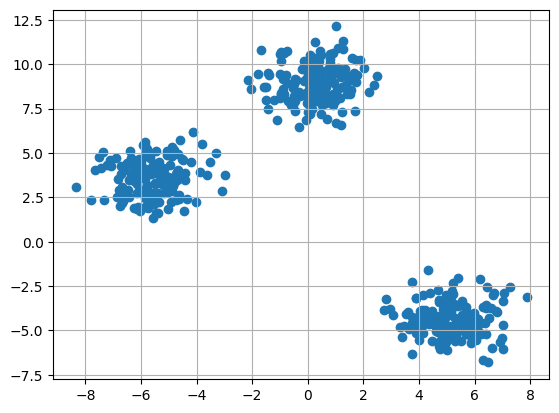

In [22]:
x, y= make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)
fig= plt.figure(0)
plt.grid(True)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

Initialize the random centroids

The code initializes three clusters for Kmeans clustering . It sets a random seed nd generates andom cluster centers within a specified ranges and creates an empty list of points for each cluster .

In [8]:
k= 3
clusters={}
np.random.seed(23)

for idx in range(k):
  center=(2*(2*np.random.random((x.shape[1],)) -1))
  points= []
  cluster= {
      'center': center,
      'points': []
  }
  clusters [idx]= cluster
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

Plot the random initialize center with data points

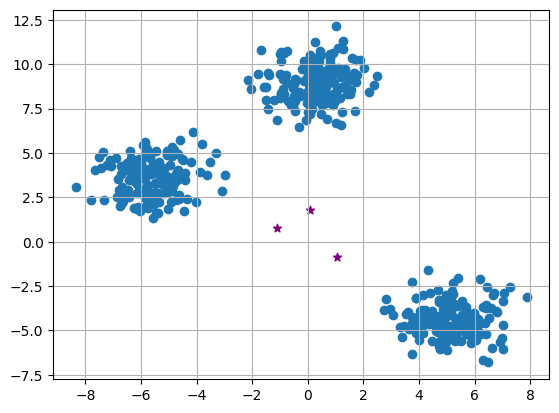

In [9]:
plt.scatter(x[:,0], x[:, 1])
plt.grid(True)
for i in clusters:
  center= clusters[i]['center']
  plt.scatter(center[0], center[1], marker='*', c='purple')
plt.show()

The plot displays a scatter plot of data points ```(x[:, 0], x[:,1]``` with grid lines. It also marks the initial cluster centers(Red stars) generated for k-means clustering.


Find euclidean distance

In [10]:
def distance (p1, p2):
  return np.sqrt(np.sum((p1-p2)**2))

Create the function to assign and update the cluster center.

In [ ]:
# def assign_clusters(x, clusters):
#   for idx in range(x.shape[0]):
#     dist=[]
#     curr_x=x[idx]
#     for i in range(k):
#       dis=distance(curr_x, clusters[i]['center'])
#       dis.append(dis)
#       curr_cluster=np.argmin(dist)
#       clusters[curr_cluster]['points'].append(curr_x)
#     return clusters
# def update_Clusters(x, clusters):
#   for i in range(k):
#     points=np.array(clusters[i]['points'])
#     if points.shape[0]>0:
#       new_center=points.mean(axis=0)
#       clusters[i]['center']=new_center
#       clusters[i]['points']=[]
#   return clusters

In [14]:

def assign_clusters(x,clusters):
  for idx in range(x.shape[0]):
    dist =[]
    curr_x = x[idx]

    for i in range(k):
      dis = distance(curr_x,clusters[i]['center'])
      dist.append(dis)

    curr_cluster= np.argmin(dist)
    clusters[curr_cluster]['points'].append(curr_x)
  return clusters

def update_clusters(x,clusters):
  for i in range(k):
    points = np.array(clusters[i]['points'])
    if points.shape[0] >0:
        new_center = points.mean(axis=0)
        clusters[i]['center'] = new_center

        clusters[i]['points'] =[]
  return clusters


Create the function to predict the cluster for datapoints

In [15]:

def pred_cluster(x,clusters):
    pred =[]
    for i in range(x.shape[0]):
        dist =[]
        for j in range(k):
            dist.append(distance(x[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

Assign, update abd predict the cluster center

In [ ]:
clusters = assign_clusters(x,clusters)
clusters = update_clusters(x,clusters)
pred = pred_cluster(x,clusters)

Plot the data points with their predicated cluster center

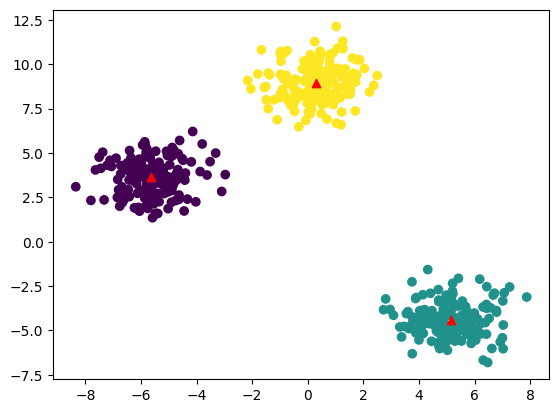

In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)

kmeans = KMeans(n_clusters=3, random_state=23)
pred = kmeans.fit_predict(x)

clusters = kmeans.cluster_centers_

plt.scatter(x[:, 0], x[:, 1], c=pred)
for center in clusters:
    plt.scatter(center[0], center[1], marker='^', c='red')

plt.show()